In [98]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import animation
import seaborn as sns
from scipy.stats import bernoulli, binom, beta

from IPython.display import HTML

In [99]:
def get_n1_n0(data, positive, negative):
    return np.sum(data == positive), np.sum(data == negative)

In [100]:
d1 = np.array(['H', 'H'])
d2 = np.array(['H', 'H', 'H', 'H'])

### Likelihoods
#### Using binomial

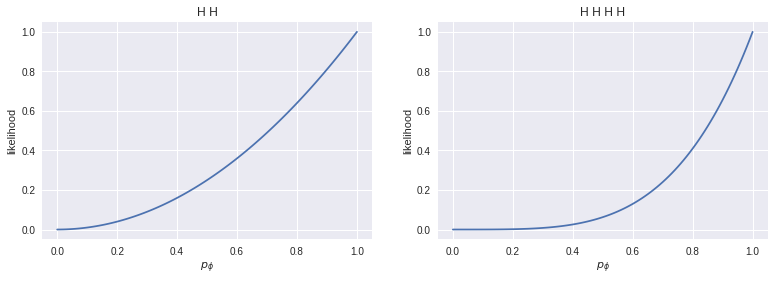

In [101]:
space = np.arange(0, 1.01, 0.01)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))

for ax, d in zip([ax1, ax2], [d1, d2]):
    ax.grid(True)
    ax.set_ylabel('likelihood')
    ax.set_xlabel('$p_\phi$')
    ax.set_title(' '.join(d))
    
    n1, n0 = get_n1_n0(d, positive='H', negative='T')
    n = n1 + n0

    likelihoods = binom.pmf(n1, n, space)
    ax.plot(space, likelihoods)

#### Using bernoulli

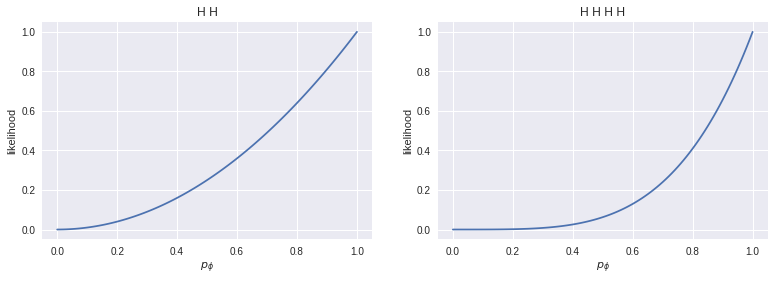

In [102]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))

for ax, d in zip([ax1, ax2], [d1, d2]):
    ax.grid(True)
    ax.set_ylabel('likelihood')
    ax.set_xlabel('$p_\phi$')
    ax.set_title(' '.join(d))
    
    n1, n0 = get_n1_n0(d, positive='H', negative='T')
    n = n1 + n0

    likelihoods = [phi ** n1 * (1 - phi) ** n0 for phi in space]
    ax.plot(space, likelihoods)


#### Using beta

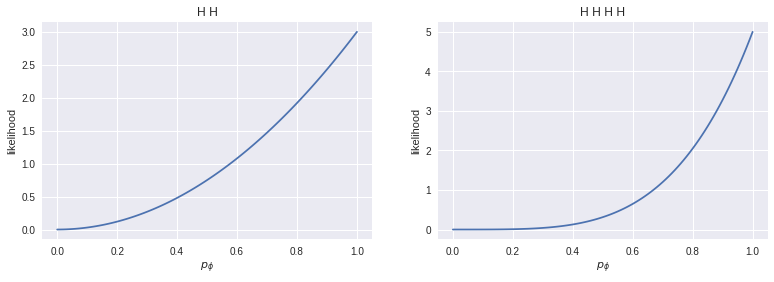

In [103]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))

for ax, d in zip([ax1, ax2], [d1, d2]):
    ax.grid(True)
    ax.set_ylabel('likelihood')
    ax.set_xlabel('$p_\phi$')
    ax.set_title(' '.join(d))
    
    n1, n0 = get_n1_n0(d, positive='H', negative='T')
    n = n1 + n0

    likelihoods = beta.pdf(space, n1 + 1, n0 + 1)
    ax.plot(space, likelihoods)

#### Posterior using beta

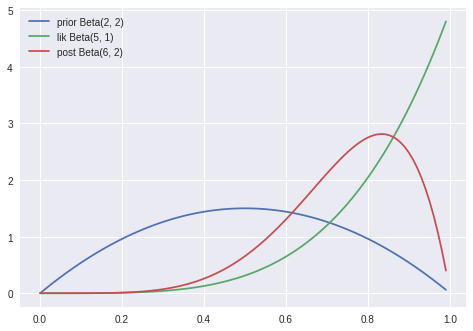

In [104]:
priors = [2, 2]

space = np.arange(0, 1, 0.01)
n1, n0 = get_n1_n0(d2, positive='H', negative='T')

prior, = plt.plot(space, beta.pdf(space, priors[0], priors[1]), label=f'prior Beta({priors[0]}, {priors[1]})')
lik, = plt.plot(space, beta.pdf(space, n1 + 1, n0 + 1), label=f'lik Beta({n1 + 1}, {n0 + 1})')
post, = plt.plot(space, beta.pdf(space, n1 + priors[0], n0 + priors[1]), label=f'post Beta({n1 + priors[0]}, {n0 + priors[1]})')

plt.legend(handles=[prior, lik, post])



In [105]:
def get_map(n1, n0, a, b):
    n = n1 + n0
    return (a + n1 - 1) / (a + b + n - 2)

get_map(n1, n0, 2, 2)

0.83333333333333337

In [106]:
def get_posterior_predictive(priors, n1, n0):
    a = n1 + priors[0]
    b = n0 + priors[1]

    return a / (a + b)
    
p = get_posterior_predictive([2, 2], n1, n0)
p

0.75

In [107]:
def predict(p):
    return 'H' if np.random.uniform() < p else 'T'

predict(p)

'H'

In [108]:
def get_posterior(x, priors, n1, n0):
    return beta.pdf(x, n1 + priors[0], n0 + priors[1])

In [109]:
bank = pd.read_csv('datasets/bank.csv', sep=';')
bank.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

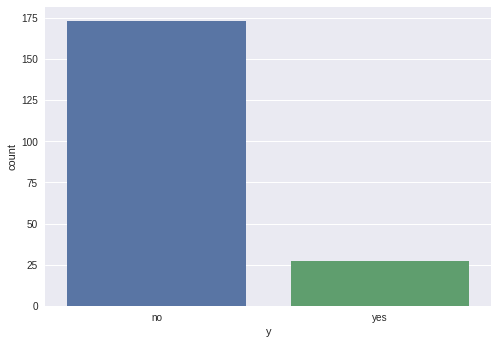

In [110]:
ax = sns.countplot(x='y', data=bank[:200])

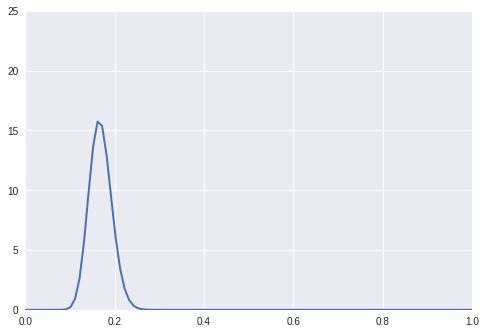

In [111]:
data = bank['y'][:200]

priors = [10, 10]

n1_sum = 0
n0_sum = 0

fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(0, 25))
ax.grid(True)
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i, data, priors):
    global n1_sum, n0_sum
    
    n1, n0 = get_n1_n0(data[i], positive='yes', negative='no')
    
    n1_sum += n1
    n0_sum += n0
            
    x = np.linspace(0, 1, 100)
    y = get_posterior(x, priors, n1_sum, n0_sum)
    
    line.set_data(x, y)
    
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init, fargs=(data, priors),
                               frames=len(data), interval=100, blit=True)

HTML(anim.to_html5_video())

In [112]:
diabetes = pd.read_csv('datasets/pima-indians-diabetes.csv', skiprows=9)
diabetes.head()

times_pregnant  plasma  blood_pressure  skin_thickness  insulin  mass_idx  \
0               6     148              72              35        0      33.6   
1               1      85              66              29        0      26.6   
2               8     183              64               0        0      23.3   
3               1      89              66              23       94      28.1   
4               0     137              40              35      168      43.1   

   pedigree  age  class  
0     0.627   50      1  
1     0.351   31      0  
2     0.672   32      1  
3     0.167   21      0  
4     2.288   33      1

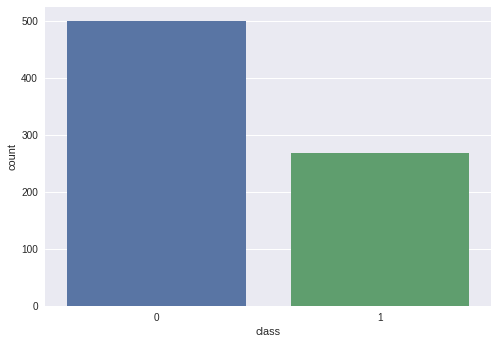

In [113]:
ax = sns.countplot(x='class', data=diabetes)

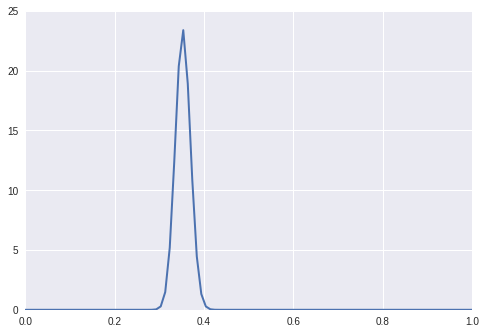

In [114]:
data = diabetes['class']

priors = [10, 10]

n1_sum = 0
n0_sum = 0

fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(0, 25))
ax.grid(True)
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i, data, priors):
    global n1_sum, n0_sum
    
    n1, n0 = get_n1_n0(data[i], positive=1, negative=0)
    
    n1_sum += n1
    n0_sum += n0
            
    x = np.linspace(0, 1, 100)
    y = get_posterior(x, priors, n1_sum, n0_sum)
    
    line.set_data(x, y)
    
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init, fargs=(data, priors),
                               frames=len(data), interval=100, blit=True)

HTML(anim.to_html5_video())